# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.082629e+01     9.211481e+00
 * time: 0.0019910335540771484
     1     2.268841e+01     4.154500e+00
 * time: 0.010174989700317383
     2     1.617219e+01     3.736592e+00
 * time: 0.01797199249267578
     3     1.219105e+01     2.078497e+00
 * time: 0.02507305145263672
     4     1.212615e+01     3.582788e+00
 * time: 0.031023025512695312
     5     1.132613e+01     2.466545e+00
 * time: 0.03692817687988281
     6     1.027156e+01     1.964748e+00
 * time: 0.042562007904052734
     7     9.376385e+00     1.623928e+00
 * time: 0.09001398086547852
     8     8.819674e+00     1.239198e+00
 * time: 0.09428095817565918
     9     8.520289e+00     9.075067e-01
 * time: 0.09835004806518555
    10     8.368514e+00     8.172735e-01
 * time: 0.10236907005310059
    11     8.247823e+00     6.704034e-01
 * time: 0.10640406608581543
    12     8.174434e+00     5.227648e-01
 * time: 0.10964298248291016
    13     8.105692e+00     3.670803e-01
 * 

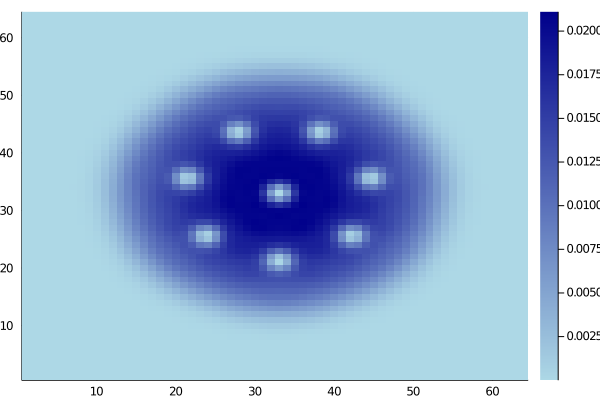

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)